# 1. Örneklem

In [1]:
import numpy as np

In [4]:
anakitle = np.random.randint(0, 80, 10000)   # 0 yaş ile 80 yaş arasında bulunan 10000 kişi olduğunu varsayalım.

In [5]:
anakitle[1:10]   # elimizde 10000 tane gözlem bulunmakta.

array([52, 58,  7, 70, 66, 60, 71, 41, 52])

In [6]:
np.random.seed(10)
orneklem = np.random.choice(a = anakitle, size = 100)
orneklem[1:10]

array([50, 45, 69, 22, 38, 19, 35, 64, 68])

In [7]:
orneklem.mean()

41.03

In [8]:
anakitle.mean()

39.547

In [9]:
np.random.seed(10)
orneklem1  = np.random.choice(a = anakitle, size = 100)
orneklem2  = np.random.choice(a = anakitle, size = 100)
orneklem3  = np.random.choice(a = anakitle, size = 100)
orneklem4  = np.random.choice(a = anakitle, size = 100)
orneklem5  = np.random.choice(a = anakitle, size = 100)
orneklem6  = np.random.choice(a = anakitle, size = 100)
orneklem7  = np.random.choice(a = anakitle, size = 100)
orneklem8  = np.random.choice(a = anakitle, size = 100)
orneklem9  = np.random.choice(a = anakitle, size = 100)
orneklem10 = np.random.choice(a = anakitle, size = 100)

In [11]:
orneklemDagilim = (orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()+
                   orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

orneklemDagilim

39.922

In [12]:
# görüldüğü üzere, örneklem sayısı/örnekleme arttıkça, elimizdeki örneklemelerin aritmetik ortalamalarının aritmetik ortalamaları
# anakitle değerine çok yakın bir değere sahip olmamızı sağlar. Sonsuz örnekleme ortalaması bize anakitle ortalamasını verir.(Örnek Teorisi)

In [34]:
orneklemlerim = []
np.random.seed(10)
for i in range(0, 1000):
    orneklemlerim.append(np.random.choice(a = anakitle, size = 100).mean())

toplam = 0
for i in range(0, 1000):
    toplam += orneklemlerim[i]
toplam /= 1000
toplam    # görüldüğü üzere elimizde 1000 örnek olduğunda anakitle ortalamasına daha çok yaklaşmış olduk.

39.58857000000001

In [62]:
orneklemlerim = []
np.random.seed(10)
for i in range(0, 100000):
    orneklemlerim.append(np.random.choice(a = anakitle, size = 100).mean())

toplam = 0
for i in range(0, 100000):
    toplam += orneklemlerim[i]
toplam /= 100000
toplam    # örnek sayımız 100000 olduğunda

39.14918959999984

In [37]:
orneklemlerim = []
np.random.seed(10)
for i in range(0, 1000000):
    orneklemlerim.append(np.random.choice(a = anakitle, size = 100).mean())

toplam = 0
for i in range(0, 1000000):
    toplam += orneklemlerim[i]
toplam /= 1000000
toplam    # örnek sayımız 1000000(bir milyon) olduğunda

39.54607363999945

--------------

# 2. Güven Aralıkları

In [48]:
import numpy as np
np.random.seed(10)
anakitle = np.random.randint(0, 80, 10000)
np.random.seed(10)
orneklem = np.random.choice(a = anakitle, size = 100)

In [49]:
orneklem.mean()

38.72

In [50]:
import scipy.stats as st

In [54]:
st.t.interval(alpha = 0.95, df = len(orneklem) - 1, loc = np.mean(orneklem), scale = st.sem(orneklem))
# güven aralığı hesaplaması : 'st.sem' ortak standart hatayı, alpha 'z'yi ifade ediyor.
# aldığımız sonuca göre anakitlemizin ortalaması % 95'in içerisinde 34 - 43 arasında değişiyor. Kalan % 5'lik kısımda(yanılma payı) bu durumun dışına çıkabilir.

(34.21439518785442, 43.225604812145576)

In [56]:
anakitle.mean()  # anakitle ortalaması da %95 ihtimal ile bu aralıktadır.

39.1523

In [57]:
import statsmodels.stats.api as sms
sms.DescrStatsW(orneklem).tconfint_mean()    #  Güven aralığının başka bir şekilde gösterilişi

(34.21439518785442, 43.225604812145576)

------------------------

# 3. Olasılık Dağılımları

## 3.1. Bernoulli

In [63]:
from scipy.stats import bernoulli

In [64]:
veri_ber = bernoulli.rvs(size = 10000, p = 0.5)

In [66]:
veri_ber[0:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

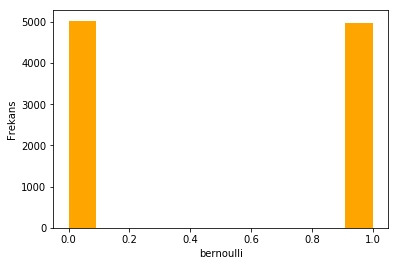

In [68]:
import seaborn as sns
ax = sns.distplot(veri_ber, kde = False, color = "orange", hist_kws = {"linewidth" : 15, "alpha" : 1});
ax.set(xlabel = "bernoulli", ylabel = "Frekans");

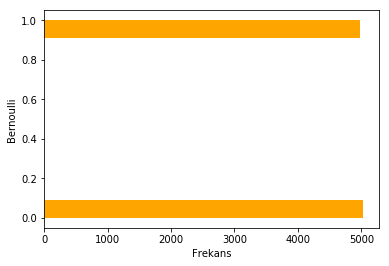

In [71]:
ax = sns.distplot(veri_ber, kde = False, color = "orange", hist_kws = {"linewidth" : 15, "alpha" : 1}, vertical = True);
ax.set(xlabel = "Frekans", ylabel = "Bernoulli");

In [72]:
rng = np.random.RandomState(123)
yazi_tura = rng.randint(0, 2, size = 1000)
yazi_tura[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [90]:
yazilar = np.sum(yazi_tura)  # yaziların adedini bütün 1 lere toplayarak elde ederim. Çünkü 1'ler yazı, 0'lar ise turadır.(VARSAYIM !)

In [80]:
yazilar

520

In [77]:
yazi_tura.shape

(1000,)

In [78]:
yazi_tura.shape[0]

1000

In [81]:
turalar = yazi_tura.shape[0] - yazilar   # yazi.tura'nın satır sayısından, yazıların toplamını çıkarırsam turaları elde ederim.

In [83]:
turalar   # olasılığı %50 verdik fakat istatistiksel olarak hata bırakabiliyor(çok önemli değil).

480

In [88]:
yaziIhtimal = yazilar / yazi_tura.shape[0]   # yazı gelme ihtimalini bulmamıza yarar.

yaziIhtimal

0.52

In [89]:
turaIhtimal = turalar / yazi_tura.shape[0]   # tura gelme ihtimalini bulmamızı sağlar.

turaIhtimal

0.48

In [93]:
## Büyük Sayılar Yasası

rng = np.random.RandomState(123)

for i in [1, 2, 3, 4, 5, 6, 7]:
    deney_sayisi = 10 ** i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)
    yazi_olasilikları = np.mean(yazi_turalar)
    print("Yazı olasılıkları : %.2f" % (yazi_olasilikları * 100))
    
# deney sayısı arttıkça olasılık değerinin teorik değere yaklaştığı çok bariz bir şekilde belli olmaktadır.

Yazı olasılıkları : 30.00
Yazı olasılıkları : 48.00
Yazı olasılıkları : 53.60
Yazı olasılıkları : 49.53
Yazı olasılıkları : 49.80
Yazı olasılıkları : 50.03
Yazı olasılıkları : 50.03


--------------

## 3.2. Binom Dağılımı

In [94]:
from scipy.stats import binom

[Text(0, 0.5, 'Frekans'), Text(0.5, 0, 'Binom Dağılımı')]

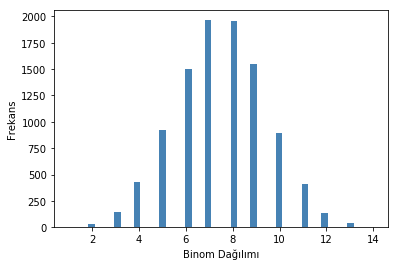

In [95]:
veri_binom = binom.rvs(n = 15, p = 0.5, size = 10000)

ax = sns.distplot(veri_binom, kde = False, color = "steelblue", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Binom Dağılımı", ylabel = "Frekans")

[Text(0, 0.5, 'Binom Dağılımı'), Text(0.5, 0, 'Frekans')]

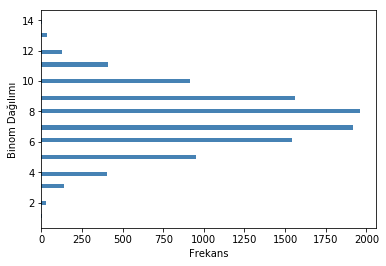

In [97]:
veri_binom = binom.rvs(n = 15, p = 0.5, size = 10000)

ax = sns.distplot(veri_binom, kde = False, color = "steelblue", hist_kws = {"linewidth" : 15, "alpha" : 1}, vertical = True)

ax.set(xlabel = "Frekans", ylabel = "Binom Dağılımı")

[Text(0, 0.5, 'Frekans'), Text(0.5, 0, 'Binom Dağılımı')]

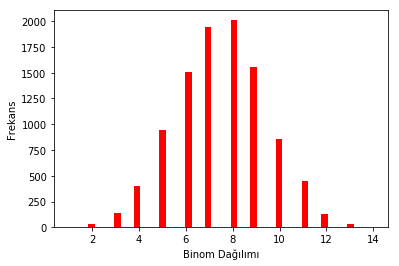

In [99]:
veri_binom = binom.rvs(n = 15, p = 0.5, size = 10000)

ax = sns.distplot(veri_binom, kde = False, color = "red", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Binom Dağılımı", ylabel = "Frekans")

[Text(0, 0.5, 'Frekans'), Text(0.5, 0, 'Binom Dağılımı')]

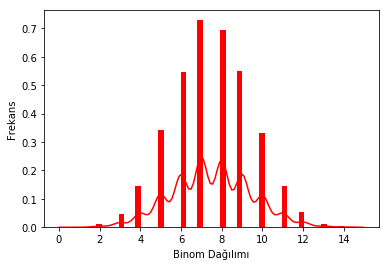

In [110]:
veri_binom = binom.rvs(n = 15, p = 0.5, size = 10000)

# 'kde' dağılımını True yaparak olasılık dağılımını da görselleştirdik.
ax = sns.distplot(veri_binom, kde = True, color = "red", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Binom Dağılımı", ylabel = "Frekans")

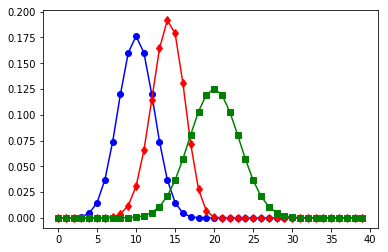

In [111]:
# şimdi birden fazla olasılık fonksiyonunun dağılımını incelemek istediğimizi düşünelim;
# böylece aralarındaki deneme sayısı ve olasılık değerlerinin değişmesi ile nasıl bir dağılım değişikliği olduğunu görsellemeye çalışalım.

import scipy.stats as stats
from matplotlib.pyplot import plot

bd1 = stats.binom(20, 0.5)  # 20 deneme, 0.5 olasılık, mavi renkli
bd2 = stats.binom(20, 0.7)  # 20 deneme, 0.7 olasılık, kırmızı renkli
bd3 = stats.binom(40, 0.5)  # 40 deneme, 0.5 olasılık, yeşil renkli

k = np.arange(40)  # her birisini aynı grafikte görselleştirebilmek adına(x eksenimiz)

# 'pmf : probability mass function'

plot(k, bd1.pmf(k), "o-b"); 
plot(k, bd2.pmf(k), "d-r");
plot(k, bd3.pmf(k), "s-g");

In [105]:
p = 0.5
n = 20
rv = stats.binom(n, p)

In [107]:
rv.pmf(10)  # x = 10 olduğunda elimizde olan değer(olasılık), mavi renkli grafikte x = 10 olan değerle çakışmakta. Yani çizilen grafiklerimiz doğru.

0.17619705200195293

In [109]:
# şimdi de dağılımın yapısını değiştirelim: (yaşil renkli olan grafik)
p1 = 0.5
n1 = 40
rv1 = stats.binom(n1, p1)
rv1.pmf(10) # 0'a çok yakın bir değer olduğu bilgisini elde etmiş olduk.

0.0007709427591180397

-------------------------------

## 3.3. Poisson Dağılımı

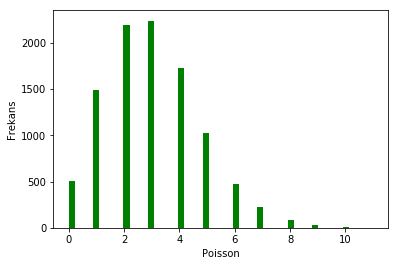

In [113]:
from scipy.stats import poisson
import scipy.stats as stats
from matplotlib.pyplot import plot

veri_poisson = poisson.rvs(mu = 3, size = 10000)

ax = sns.distplot(veri_poisson, kde = False, color = "green", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Poisson", ylabel = "Frekans");

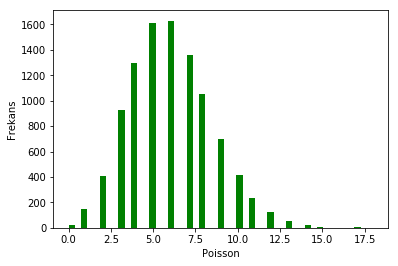

In [114]:
from scipy.stats import poisson
import scipy.stats as stats
from matplotlib.pyplot import plot

veri_poisson = poisson.rvs(mu = 6, size = 10000)

ax = sns.distplot(veri_poisson, kde = False, color = "green", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Poisson", ylabel = "Frekans");

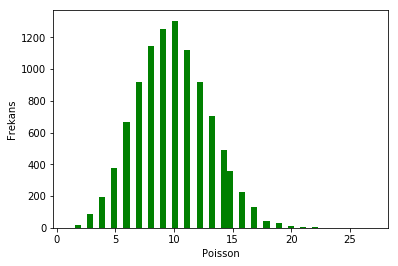

In [118]:
from scipy.stats import poisson
import scipy.stats as stats
from matplotlib.pyplot import plot
# burası dağılım
veri_poisson = poisson.rvs(mu = 10, size = 10000)

ax = sns.distplot(veri_poisson, kde = False, color = "green", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Poisson", ylabel = "Frekans");

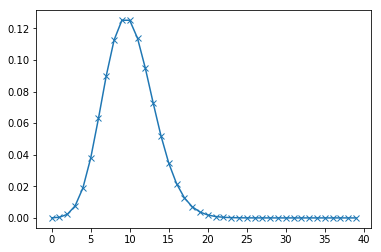

In [119]:
k = np.arange(40)
# burası ise olasılık dağılımı
ps = stats.poisson(10)
plot(k, ps.pmf(k), "x-");

In [120]:
n = 100  # deneme sayısı
k = 5  # başarı sayısı, yakalamaya çalıştığımız olay.
p = 0.01  # olasılık. Eğer bize verilmezse p = k / n olarak kendimiz bulacağız.

lambda1 = n * p

In [121]:
lambda1

1.0

In [122]:
rv = stats.poisson(mu = lambda1)
rv.pmf(k)

0.00306566200976202

------------

## 3.4. Normal Dağılım

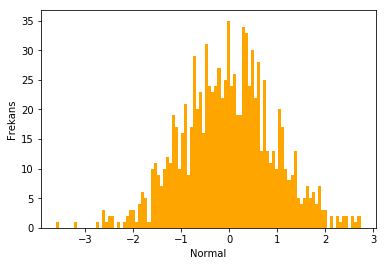

In [133]:
# olasılık fonksiyonunun grafiği :  olasılık dağılımını üreten fonksiyondur.

from scipy.stats import norm
import seaborn as sns

veri_normal = norm.rvs(size = 1000, loc = 0, scale = 1)

ax = sns.distplot(veri_normal, bins = 100, kde = False, color = "orange", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Normal", ylabel = "Frekans");

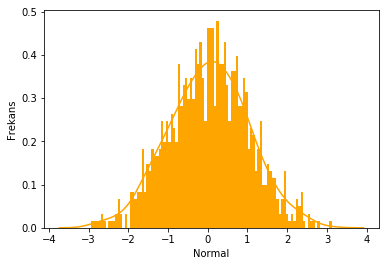

In [124]:
from scipy.stats import norm
import seaborn as sns

veri_normal = norm.rvs(size = 1000, loc = 0, scale = 1)

ax = sns.distplot(veri_normal, bins = 100, kde = True, color = "orange", hist_kws = {"linewidth" : 15, "alpha" : 1})

ax.set(xlabel = "Normal", ylabel = "Frekans");

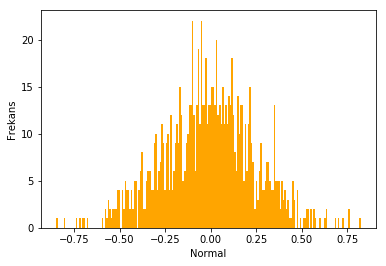

In [132]:
from scipy.stats import norm
import seaborn as sns

veri_normal = norm.rvs(size = 1000, loc = 0, scale = 0.25)

ax = sns.distplot(veri_normal, bins = 200, kde = False, color = "orange", hist_kws = {"linewidth" : 30, "alpha" : 1})

ax.set(xlabel = "Normal", ylabel = "Frekans");

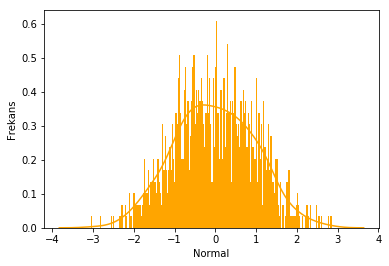

In [127]:
from scipy.stats import norm
import seaborn as sns

veri_normal = norm.rvs(size = 1000, loc = 0, scale = 1)

ax = sns.distplot(veri_normal, bins = 200, kde = True, color = "orange", hist_kws = {"linewidth" : 10, "alpha" : 1})

ax.set(xlabel = "Normal", ylabel = "Frekans");

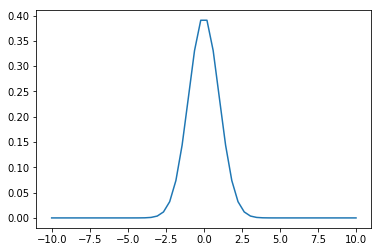

In [134]:
# şimdi de olasılık yoğunluk fonksiyonunun grafiğini ele alalım.
import numpy as np

k = np.linspace(-10, 10)
pd = stats.norm(0,1)  # ortalaması 0, standart sapması(varyans) 1
plot(k, pd.pdf(k));  # pdf : probability density function --> olasılık yoğunluk fonksiyonu

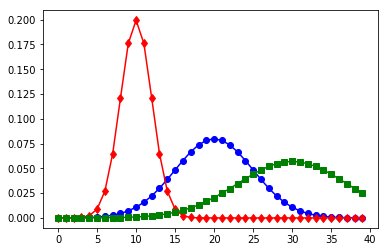

In [136]:
# şimdi binom bölümünde yaptığımız gibi farklı olasılık yoğunluklarının grafiklerini birlikte değerlendirelim.

nm1 = stats.norm(20, 5)  # ortalaması 20, standart sapması 5
nm2 = stats.norm(10, 2)  # ortalaması 10, standart sapması 2
nm3 = stats.norm(30, 7)  # ortalaması 30, standart sapması 7
k = np.arange(40)
plot(k, nm1.pdf(k), "o-b");  # mavi
plot(k, nm2.pdf(k), "d-r");  # kırmızı
plot(k, nm3.pdf(k), "s-g");  # yeşil

In [137]:
# şimdi de bu grafikleri analitik olarak onaylıyalım :

rv = stats.norm(0, 1)  # ortalaması 0, standart sapması 1
rv.pdf(0)

0.3989422804014327

In [138]:
rv.pdf(10)

7.69459862670642e-23

In [140]:
rv = stats.norm(20, 5)  # ortalaması 20, standart sapması 5 olanı(mavi renkli) seçtik.
rv.pdf(10)  # mavi renkli grafiğin 10'daki değerini bu şekilde görebiliriz.

0.010798193302637612

In [142]:
rv = stats.norm(10, 2)  # ortalaması 10, standart sapması 2 olanı(kırmızı renkli) seçtik.
rv.pdf(10)  # kırmızı renkli grafiğin 10'daki değerini(0.2'ye eşit yada çok yakın bir değer) bu şekilde görebiliriz.

0.19947114020071635

-------------

# 4. Tek Örneklem T Testi

In [145]:
import numpy as np
import pandas as pd

# Web sitemizde geçirilen süre gerçekten 170 saniye mi ?
# elimizde, np.array'deki bilgilere göre sitemizi takip eden insanların harcadıkları ortalama zamanlar var.
# Örnek : olcumler[0]'da sitemizde ayda ortalama 17 saniye zaman harcanmış.
# bu hipotez testine 'tek örneklem hipotez testi' denir.

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119,
                    157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146,
                    203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110,
                    216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

olcumler[1:10]

array([160, 234, 149, 145, 107, 197,  75, 201, 225])

In [146]:
import scipy.stats as stats

In [147]:
stats.describe(olcumler)  # ortalamanın(mean) 154.38 gelmesi bizi aldatmamalı.

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [148]:
# bu ortalama(mean) 154.38 değeri şansa bağlı olarak oluşmuş olamaz mı ? başka bi olcumler arrayinde daha farklı sonuç gelebilir.
# bu nedenden ötürü hipotez tesi bize bu farkın istatistiksel olarak anlamlı olup olmadığını söyleme şansı verir.

In [149]:
# Varsayım Sınanması
    # 1. yöntem : Histogram Yöntemi, bu yöntemle birlikte görselleştirmek adına 'qqplot' kullanılabilir.
    # 2. yöntem : Shapiro Wilk Testi

In [151]:
from matplotlib.pyplot import plot

olcumler.plot.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

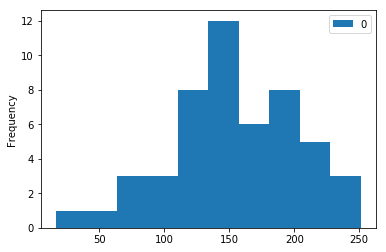

In [153]:
from matplotlib.pyplot import plot
pd.DataFrame(olcumler).plot.hist();

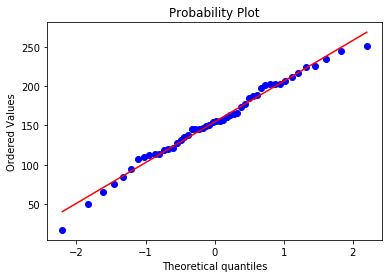

In [155]:
import pylab
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()  # burada teorik değerler ile gerçek değerler arasındaki durumu görebilmek adına qqplot denilen bir yapı oluşturuldu.

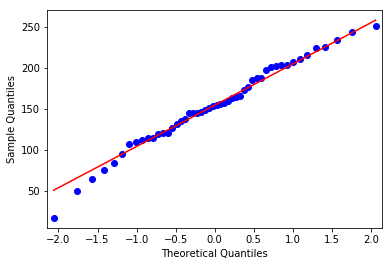

In [156]:
import statsmodels.api as sm
sm.qqplot(olcumler, line = "s")
pylab.show()

In [174]:
# shapiro-wilks testi

from scipy.stats import shapiro
shapiro(olcumler)  # 2 değerli bir çıktı aldık. Sol taraftaki değer 'T' istatistiğini ifade eder. Sağ taraftaki ise 'p-value' değerini ifade eder.
# kabul ettiğimiz hata değeri alfa 0.05'tir.
# shapiro-wilks testi sonucu istediğimiz gibi dönmedi, ve tek örneklem T testini parametrik olarak yapamadığımızı anlamış olduk.

(0.9853105545043945, 0.7848747968673706)

In [164]:
# Tek Örneklem T Testi

stats.ttest_1samp(olcumler, popmean = 170)  # çıktının sol tarafında test istatistiği, sağ tarafında p-value bulunmaktadır.
# pvalue değeri 0.05 olan alfa değerinden küçük olmasından dolayı 'H0 hipotezi' reddedilir.
# dolayısı ile web sitemizde geçirilen süre '170 saniye değildir' diyebiliriz.
# elde ettiğimiz değerler test istatistiğidir.

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [165]:
# T Tablo değerinin elde edilmesi

stats.t.ppf(q = 0.025, df = len(olcumler) - 1)  # 'q' değeri alfanın yarısıdır. 'df' ise serbestlik derecemizdir.
# elde ettiğimiz değer tablo değeridir.
# bir önceli hücrede bulunan 'statistic' değerimiz bu hücrede aldığımız tablo değerinden küçük olduğundan dolayı 'HO hipotezi' nin reddedildiğini bir kez daha ispatlamış olduk.

-2.0095752344892093

In [166]:
# Bu örnek için bakılmayacak olsa da, pozitif T değerinede bakabiliriz.
# pozitif T değerini bulmak için; 'yeni q' değerimizi 1 - 'eski q' yani 1 - 0.025 = 0.975 olarak almamız gerekmektedir.

stats.t.ppf(q = 0.975, df = len(olcumler) - 1)

2.009575234489209

In [168]:
# T istatistiği üzerinden p-value hesabı

stats.t.cdf(x = - 2.1753117985877966, df = len(olcumler) - 1) * 2  # iki yönlü olduğundan dolayı bu çarpma işlemini yaptık.

0.034460415195071446

In [169]:
# Tek yönlü hipotez testi değerlendirmesi

# küçüktür/büyüktür şeklinde bir hipotez kurmak istersek ne yapabiliriz ?
    # küçüktür için :  p-value / 2 < 0.05 ve t < 0
    # büyüktür için :  p-value / 2 < 0.05 ve t > 0
# amacımız tek yönlü hipotezi küçüktür yada büyüktür şeklinde yorumluyabilmek.

In [172]:
# Güven Aralığı Hesaplamak

import statsmodels.stats.api as sms
sms.DescrStatsW(olcumler).tconfint_mean()

# anakitle ortalaması 154 olarak bulunmuştu(yani aralıkta / doğru !)
# lakin 170 güven aralığında değil
# dolayısı ile web sitemizde geçirilen zamanın 170 saniye olmadığı tespit edilmiştir.

(139.95008462736266, 168.80991537263733)

----------

# 5. Nonparametrik Tek Örneklem Testi

In [176]:
# shapiro-wilks testi bir önceki bölüme göre aldığımız sonucu istediğimiz gibi dönmemişti.
# bu yüzden tek örneklem T testini parametrik olarak yapamadığımızı anlamıştık.
# bu durumda nonparametrik tek örneklem testi yapmamız gerekiyor.

In [177]:
from statsmodels.stats.descriptivestats import sign_test

In [179]:
sign_test(olcumler, 170)  # çıktının solunda test istatistiği, sağında p-value bulunmaktadır.
# bu durumda H0 hipotezi reddedilmez. Ortalama 170'den istatistiksel olarak anlamlı düzeyde farklı değildir.

(-7.0, 0.06490864707227219)

In [180]:
?sign_test

Signature: sign_test(samp, mu0=0)
Docstring:
Signs test.

Parameters
----------
samp : array-like
    1d array. The sample for which you want to perform the signs
    test.
mu0 : float
    See Notes for the definition of the sign test. mu0 is 0 by
    default, but it is common to set it to the median.

Returns
---------
M, p-value

Notes
-----
The signs test returns

M = (N(+) - N(-))/2

where N(+) is the number of values above `mu0`, N(-) is the number of
values below.  Values equal to `mu0` are discarded.

The p-value for M is calculated using the binomial distrubution
and can be intrepreted the same as for a t-test. The test-statistic
is distributed Binom(min(N(+), N(-)), n_trials, .5) where n_trials
equals N(+) + N(-).

See Also
---------
scipy.stats.wilcoxon
File:      c:\users\sefa3\anaconda3\lib\site-packages\statsmodels\stats\descriptivestats.py
Type:      function


------------

# 6. Tek Örneklem Oran Testi

In [183]:
# Problem : dönüşüm oranı tst edilmek isteniyor.

# H0 : p == 0.125
# H1 : p != 0.125

# 500 kişi tıklamış 40 tanesi alışveriş yapmış.
# Örnek oranı : 40 / 500 = 0.08

# merak edilen durum ise örnekler aracılığı ile hesaplananacak istatistiğin hipotez testi sonucunda
# gerçekten anakitleye ilişkin varsaydığımız dönüşüm oranının bu değerlerde olup olmadığını sağlamlama testi yapmak.

In [184]:
from statsmodels.stats.proportion import proportions_ztest

In [185]:
count = 40     # gözlemlediğimiz başarı sayısı
nobs = 500     # gözlemleme sayısı
value = 0.125  # sınayacak olduğumuz null hipotezinin değeri

In [186]:
proportions_ztest(count, nobs, value)  # iki çıktılı sonuc : sağ taraf = p-value, sol taraf = test istatistiği

# sağ tarafta bulunan p-value değerini incelediğimizde anakitleye ilişkin oranın 0.125 olduğunu ifade eden H0 hipotezi
# istatistiksel olarak %95'lik güvenilirlik ile reddedilir.

(-3.7090151628513017, 0.0002080669689845979)

In [188]:
# doğruluğun / farklılığın ne tarafa olduğu görebilmek için;

count / nobs  # aşşağı yönlü bir farklılık var.

0.08

In [191]:
# H0 : p > 0.125 ve
# H1 : p != 0.125 hipotezini test edelim.

proportions_ztest(count, nobs, value, alternative = "smaller")  # 'smaller' aşağı yönlü yapmak için.

# % 95 güvenilirlik oranı ile p-value, 0.125 den küçüktür.

(-3.7090151628513017, 0.00010403348449229895)

----------------

# 7. Bağımsız İki Örneklem T Testi - AB Testi

In [3]:
import numpy as np
import pandas as pd

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24,
                 23, 25, 27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26,
                 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37,
                 30, 32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])


In [4]:
A_B = pd.concat([A,B], axis = 1)

In [5]:
A_B.head()

,0,0
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [6]:
A_B.columns = ["A", "B"]

In [7]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
Group_A = np.arange(len(A))
Group_A = pd.DataFrame(Group_A)
Group_A[:] = "A"

In [9]:
Group_A

,0
0,A
1,A
2,A
3,A
4,A
5,A
6,A
7,A
8,A
9,A


In [10]:
A = pd.concat([A, Group_A], axis = 1)

In [11]:
A.head()

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [12]:
Group_B = np.arange(len(B))
Group_B = pd.DataFrame(Group_B)
Group_B[:] = "B"

In [13]:
B = pd.concat([B, Group_B], axis = 1)

In [14]:
AB = pd.concat([A, B])

In [15]:
AB

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A
5,30,A
6,20,A
7,20,A
8,27,A
9,32,A


In [16]:
AB.columns = ["gelir", "Grup"]

In [17]:
AB.head()

,gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [18]:
import seaborn as sns
sns.boxplot(x = "Grup", y = "gelir", data = AB);

In [19]:
# Varsayım Kontrolü
#  1) Normallik Varsayımı
#  2) Varyans Homojenliği Varsayımı

In [20]:
from scipy.stats import shapiro

In [21]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [22]:
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [23]:
from scipy.stats import levene

In [24]:
levene(A_B.A, A_B.B)  # pvalue'ya baktığımızda H0'ı reddedemiyoruz.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [25]:
from scipy.stats import ttest_ind

In [26]:
ttest_ind(A_B["A"], A_B["B"], equal_var = True)  # görünen o ki iki grup arasında istatistiksel olarak bir anlam vardır.

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

----------------

# 8. Nonparametrik Bağımsız İki Örneklem T Testi - AB Testi

In [27]:
from scipy.stats import mannwhitneyu

In [28]:
mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

------------

# 9. Bağımlı İki Örneklem Testi

In [29]:
import numpy as np
import pandas as pd

oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [30]:
#BIRINCI VERI SETI
BIRLIKTE = pd.concat([oncesi, sonrasi], axis = 1)
BIRLIKTE.columns = ["oncesi","sonrasi"]

print("'BIRLIKTE' Veri Seti: \n\n ", BIRLIKTE.head(), "\n\n")


#IKINCI VERI SETI

GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
AB = pd.concat([A,B])
AB.columns = ["SKOR","ONCESI_SONRASI"]
AB


'BIRLIKTE' Veri Seti: 

     oncesi  sonrasi
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




,SKOR,ONCESI_SONRASI
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI
5,123,ONCESI
6,121,ONCESI
7,120,ONCESI
8,117,ONCESI
9,118,ONCESI


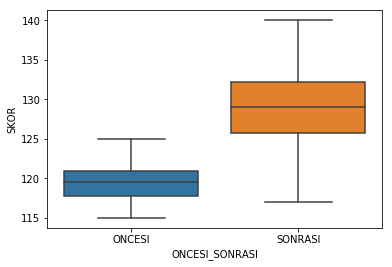

In [31]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "SKOR", data = AB);

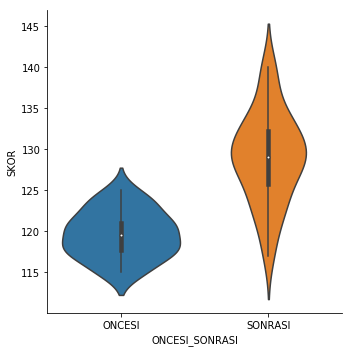

In [32]:
sns.catplot(x = "ONCESI_SONRASI", y = "SKOR", kind = "violin", data = AB);

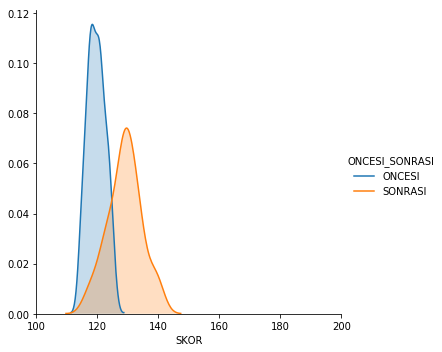

In [33]:
(sns
 .FacetGrid(AB, hue = "ONCESI_SONRASI", height = 5, xlim = (100, 200))
 .map(sns.kdeplot, "SKOR", shade = True)
 .add_legend()
);

In [34]:
# varsayımlar

In [36]:
from scipy.stats import shapiro

In [37]:
shapiro(BIRLIKTE.oncesi)

(0.9543656706809998, 0.10722451657056808)

In [38]:
shapiro(BIRLIKTE.sonrasi)

(0.9780089259147644, 0.6159515380859375)

In [39]:
from scipy.stats import levene

In [40]:
levene(BIRLIKTE.oncesi, BIRLIKTE.sonrasi)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [42]:
from scipy.stats import ttest_rel

In [43]:
ttest_rel(BIRLIKTE.oncesi, BIRLIKTE.sonrasi)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

------------

# 10. Nonparametrik Bağımlı İki Örneklem Testi

In [44]:
from scipy.stats import wilcoxon

In [45]:
wilcoxon(BIRLIKTE.oncesi, BIRLIKTE.sonrasi)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

-------------

# 11. İki Örneklem Oran Testi

In [46]:
# Yeşil Buton   : 300 tıklama, 1000 görüntülenme
# Kırmızı Buton : 250 tıklama, 1100 görüntülenme

In [47]:
from statsmodels.stats.proportion import proportions_ztest

In [48]:
basari_sayisi = np.array([300, 250])
gozlem_sayisi = np.array([1000, 1100])

In [50]:
proportions_ztest(basari_sayisi, gozlem_sayisi)  # istatistiksel olarak aralarında bir farklılık vardır.

(3.7857863233209255, 0.0001532232957772221)

In [51]:
proportions_ztest([300, 250], [1000, 1100])

(3.7857863233209255, 0.0001532232957772221)

In [52]:
300 / 1000

0.3

In [53]:
250 / 1100

0.22727272727272727

----------

# 12.1. Varyans Analizi

In [54]:
import numpy as np
import pandas as pd

A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.describe().T


,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [55]:
# varsayım kontrolü

In [56]:
shapiro(ABC["GRUP_A"])

(0.969743549823761, 0.5321813225746155)

In [57]:
shapiro(ABC["GRUP_B"])

(0.9789854884147644, 0.7979801297187805)

In [58]:
shapiro(ABC["GRUP_C"])

(0.9579201340675354, 0.273820161819458)

In [60]:
levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [61]:
from scipy.stats import f_oneway

In [62]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

-----------

# 12.2. Nonparametrik Varyans Analizi

In [63]:
from scipy.stats import kruskal

In [64]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

-------------

# 13.1. Korelasyon Analizi

In [65]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [69]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [70]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


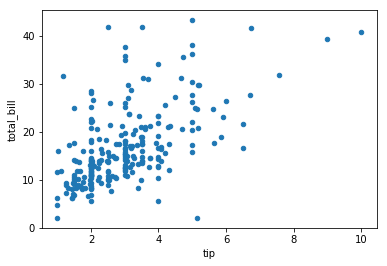

In [72]:
df.plot.scatter("tip", "total_bill");

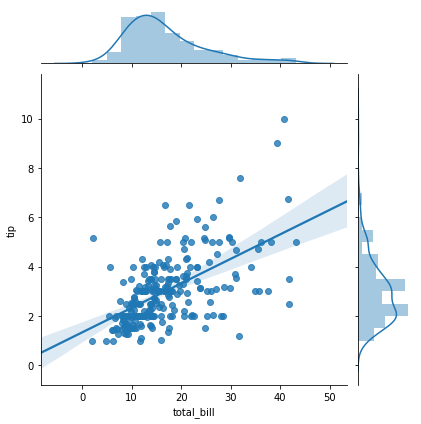

In [74]:
sns.jointplot(x = "total_bill", y = "tip", data = df, kind = "reg");

In [77]:
shapiro(df["tip"])

(0.897811233997345, 8.20057563521992e-12)

In [83]:
np.round(shapiro(df["tip"])[0], 5)

0.89781

In [84]:
np.round(shapiro(df["tip"])[1], 5)

0.0

In [85]:
np.round(shapiro(df["total_bill"])[0], 5)

0.91357

In [86]:
np.round(shapiro(df["total_bill"])[1], 5)

0.0

In [87]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [93]:
df["tip"].corr(df["total_bill"], method = "spearman")  # spearman korelasyon katsayısı ile

0.593691939408997

In [89]:
from scipy.stats.stats import pearsonr

In [90]:
pearsonr(df["total_bill"], df["tip"])

(0.5766634471096381, 5.018290084948595e-23)

------

# 13.2. Nonparametrik Korelasyon Analizi

In [95]:
from scipy.stats import spearmanr
spearmanr(df["total_bill"], df["tip"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [96]:
spearmanr(df["tip"], df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [97]:
spearmanr(df["tip"], df["tip"])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [100]:
from scipy.stats import kendalltau

In [99]:
kendalltau(df["total_bill"], df["tip"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

---------